In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("crx.data",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [6]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [8]:
df.shape

(690, 16)

In [9]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


Three main tasks:
- Convert the non-numeric data into numeric.
- Split the data into train and test sets.
- Scale the feature values to a uniform range.

In [10]:
Labelenc= LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = Labelenc.fit_transform(df[i])

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [12]:
# Dropping the not regquired column 11 and 13
df=df.drop([11,13],axis=1)

In [13]:
X= df.iloc[:,0:13]
Y= df.iloc[:,13]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [15]:
scaler= MinMaxScaler(feature_range=(0,1))
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [16]:
model= LogisticRegression()
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [17]:
y_pred= model.predict(X_test_scaled)

print(f"Accuracy of the model is: {model.score(X_test_scaled,Y_test)*100:.2f}%")

Accuracy of the model is: 83.77%


In [18]:
# Confusion matrix
confusion_matrix(Y_test,y_pred)

array([[93, 10],
       [27, 98]])

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap

In [20]:
# Calculate performance metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print the classification report
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.8377
Precision: 0.9074
Recall: 0.7840
F1 Score: 0.8412

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       103
           1       0.91      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.85      0.84      0.84       228



In [21]:
# Sensitivity Analysis
X_test_perturbed = X_test_scaled.copy()
X_test_perturbed[:, 0] += 0.01
y_pred_perturbed = model.predict(X_test_perturbed)

In [22]:
# Compare predictions before and after perturbation
print(f"Original Predictions: {np.mean(y_pred):.4f}")
print(f"Perturbed Predictions: {np.mean(y_pred_perturbed):.4f}")

Original Predictions: 0.4737
Perturbed Predictions: 0.4737


In [23]:
from sklearn.model_selection import GridSearchCV
# Defining Hyperparameters
param_grid = {'C': [0.01,0.1,1,10,100]}

# Performing Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1}


In [24]:
# Interpretability of the model using SHAP
explainer=shap.Explainer(model,X_train_scaled)
shap_values=explainer(X_test_scaled)


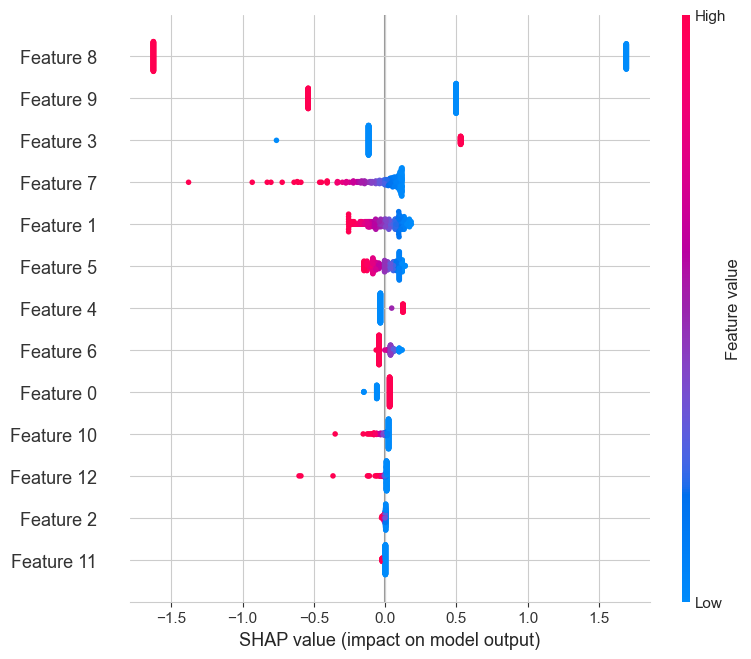

In [25]:
#Summary plot
shap.summary_plot(shap_values, X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, y_pred):.4f}")
print(f"Recall: {recall_score(Y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, y_pred):.4f}")


Accuracy: 0.4561
Precision: 0.6667
Recall: 0.0160
F1 Score: 0.0312


In [33]:
# Detecting Data Drift and Concept Drift using Cohen's H
# Defining a function to calculate Cohen's H
def cohens_h(p1,p2):
    return 2*(np.arcsin(np.sqrt(p1))- np.arcsin(np.sqrt(p2)))

# Simulating a new dataset
X_new = X_test + np.random.normal(0, 0.1, X_test.shape)
y_new_pred = model.predict(X_new)

# Compute class probabilities
p_old = np.mean(y_pred)
p_new = np.mean(y_new_pred)

# Calculate Cohen's H
drift_score = cohens_h(p_old, p_new)
print(f"Cohen's H: {drift_score:.4f} (Drift Detected if >0.1)")

Cohen's H: 0.0000 (Drift Detected if >0.1)


In [34]:
# Out-of-Time (OOT) test
X_future=X_test.copy()
y_future=model.predict(X_future)

print(f"Out-of-Time accuracy: {accuracy_score(Y_test,y_future):.4f}")

Out-of-Time accuracy: 0.4561


In [37]:
# Out-of-Sample (OOS) test
# Split data differently
X_train_new, X_oos, y_train_new, y_oos = train_test_split(X, Y, test_size=0.3, random_state=99)
model_oos = LogisticRegression()
model_oos.fit(X_train_new, y_train_new)
y_oos_pred = model_oos.predict(X_oos)

print(f"Out-of-Sample Accuracy: {accuracy_score(y_oos, y_oos_pred):.4f}")


Out-of-Sample Accuracy: 0.8213
